In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import numpy as np
from skimage import io

In [130]:
path_n1 = '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block2/cycle14_ROI1/Figure/mask-nucleus1.tif'
path_n2 = '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block2/cycle14_ROI1/Figure/mask-nucleus2.tif'
path_agg = '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block2/cycle14_ROI1/Figure/mask-aggregate.tif'
path_bg = '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block2/cycle14_ROI1/Figure/mask-background.tif'
path_dapi = '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block2/cycle14_ROI1/Figure/warp_thunder_s001_z53_to_warp_lmEM_to_hmEM-0002-rgb-nucleus-vs-aggregate.tif'

In [132]:
bg_mask = io.imread(path_bg)==255
agg_mask = io.imread(path_agg)==255
n1_mask = io.imread(path_n1)==255
n2_mask = io.imread(path_n2)==255
dapi = io.imread(path_dapi)

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


<Axes: >

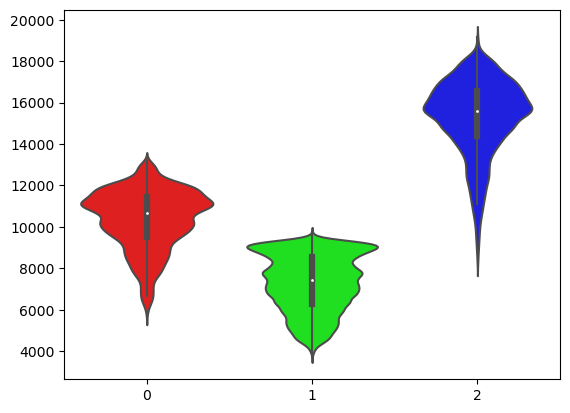

In [47]:
sns.violinplot([dapi[n2_mask],dapi[agg_mask],dapi[n1_mask]],palette=[[1,0,0,1],[0,1,0,1],[0,0,1,0]],inner='box')

In [149]:
np.round(bg_mask.sum()/500)

94.0

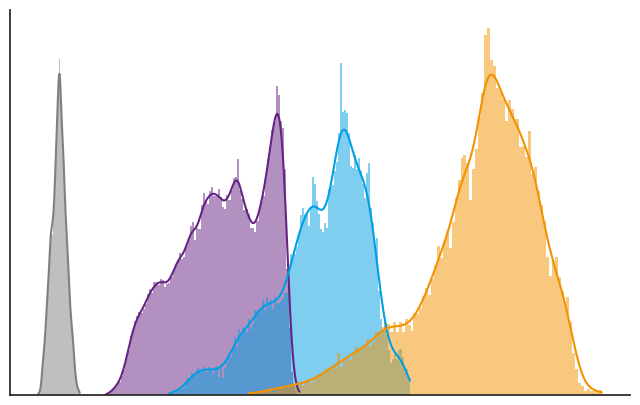

In [160]:
fig,ax = plt.subplots(figsize=(8,5))

stat = 'proportion'
bins = 100
sns.set_style(style='white')
sns.histplot(dapi[bg_mask],bins=bins,stat=stat,linewidth=0,kde=True,color='gray')
sns.histplot(dapi[agg_mask],bins=90,stat=stat,linewidth=0,kde=True,color=[102/255,36/255,131/255])
sns.histplot(dapi[n2_mask],bins=120,stat=stat,linewidth=0,kde=True,color=[0/255,159/255,227/255])
sns.histplot(dapi[n1_mask],bins=120,stat=stat,linewidth=0,kde=True,color=[243/255,146/255,0])

plt.ylabel(None)
plt.yticks([])
plt.xticks([])


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [25]:
dapi[agg_mask].shape

(189359,)

AttributeError: Rectangle.set() got an unexpected keyword argument 'alhpa'

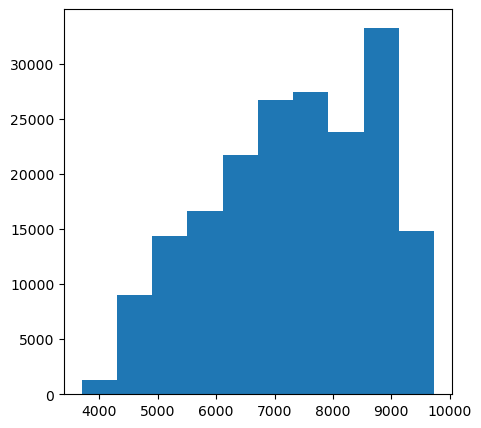

In [23]:
fig,ax = plt.subplots(1,figsize=(5,5))

plt.hist(dapi[agg_mask].flatten(),alhpa=0.5)
plt.hist(dapi[n1_mask].flatten())
plt.hist(dapi[n2_mask].flatten())

In [106]:
path_p1 = '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block2/cycle14_ROI1/profile_1.csv'
path_p2 = '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block2/cycle14_ROI1/profile_2.csv'
path_p4 = '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block2/cycle14_ROI1/profile_4.csv'
path_p5 = '/Users/lukasvandenheuvel/Documents/EPFL/MA4/PDM/Data/LH02_A03/block2/cycle14_ROI1/profile_5.csv'

In [119]:
df_list = []
for path in [path_p2,path_p4,path_p1,path_p5]:
    df = pd.read_csv(path)
    df['Distance_(um)'] = df['Distance_(inches)'] * 0.0254 * 1e6
    df['Distance_(um)'] = df['Distance_(um)'].max() - df['Distance_(um)']
    df['RFU'] =  df['Gray_Value'] / df['Gray_Value'].max()
    df_list.append(df)

In [120]:
green = [66,142,100]
pink = [188,128,167]
orange = [183,174,50]
blue = [27,156,217]
yellow = [243,230,0]
color_list = [blue,pink,green,yellow]

alpha = 0.7

for i,c in enumerate(color_list):
    color_list[i] = [v/255 for v in c]

In [121]:
len(df_list)

4

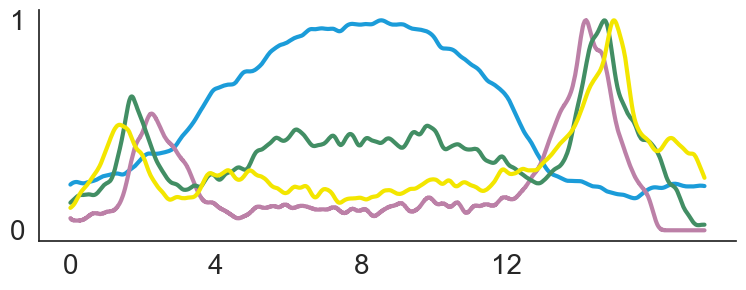

In [128]:
fig,ax = plt.subplots(figsize=(9,3))


for df,color in zip(df_list,color_list):
    df.plot(x='Distance_(um)',y='RFU',color=color,ax=ax,linewidth=3)
    
ax.get_legend().remove()
ax.set_yticks([0,1])
ax.set_xlabel('')
ax.set_xticks(range(0,16,4))
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)